## Import packages

In [1]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3
urllib3.disable_warnings()

## Import Data

In [1]:
# Replace *** with own URL and KEY 
# Sign in "https://cds.climate.copernicus.eu/#!/home"

URL = '***'
KEY = '***'
DATADIR1 = './'

In [4]:
c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'reanalysis-era5-land-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            '2m_temperature', 'total_precipitation'
        ],             
        'year': [
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
            '2021', '2022', '2023',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            72, -25, 34,
            40,
        ],
        'format': 'netcdf',
    },
    f'{DATADIR}era5_monthly_t2m_eur.nc')

2023-11-16 08:51:06,482 INFO Welcome to the CDS
2023-11-16 08:51:06,484 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means
2023-11-16 08:51:06,674 INFO Request is queued
2023-11-16 08:51:09,263 INFO Request is running
2023-11-16 08:57:25,684 INFO Request is completed
2023-11-16 08:57:25,685 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data9/adaptor.mars.internal-1700121370.4022164-17634-16-8114f939-4ed0-4c8c-a081-cc6aabe93a21.nc to ./era5_monthly_t2m_eur.nc (745.6M)
2023-11-16 08:59:21,511 INFO Download rate 6.4M/s  


Result(content_length=781800836,content_type=application/x-netcdf,location=https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data9/adaptor.mars.internal-1700121370.4022164-17634-16-8114f939-4ed0-4c8c-a081-cc6aabe93a21.nc)

## Read and select Data

In [3]:
monthly_data = f'{DATADIR}era5_monthly_t2m_eur.nc'

data = xr.open_dataset(monthly_data)

temp_data = xr.DataArray(data['t2m']).rename('Temperatur °C')
tp_data = xr.DataArray(data['tp']).rename('Niederschlag mm')

## Combine datasets

In [4]:
temp_data_combine = temp_data.sel(expver=1).combine_first(temp_data.sel(expver=5))
temp_data_combine.load()

<xarray.DataArray 'Temperatur °C' (time: 394, latitude: 381, longitude: 651)>
array([[[251.85333, 252.08545, 252.72853, ...,       nan,       nan,
               nan],
        [252.3236 , 253.04305, 253.7635 , ...,       nan,       nan,
               nan],
        [252.30249, 253.21085, 254.24985, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ..., 279.40363, 279.50513,
         279.64276],
        [      nan,       nan,       nan, ..., 279.36646, 279.49207,
         279.6307 ],
        [      nan,       nan,       nan, ..., 279.26697, 279.39258,
         279.5443 ]],

       [[253.13248, 253.31837, 253.80872, ...,       nan,       nan,
               nan],
        [253.70523, 254.26392, 254.82059, ...,       nan,       nan,
               nan],
        [253.34148, 254.11118, 255.02757, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ..., 302.07852, 302.2875 ,
         302.5367 ],
        [      nan,       nan,       nan, ..., 302.0353 , 302.2654 ,
         302.5156 ],
        [      nan,       nan,       nan, ..., 301.93784, 302.18402,
         302.46335]],

       [[257.86218, 258.08325, 258.76654, ...,       nan,       nan,
               nan],
        [258.1546 , 258.86   , 259.56537, ...,       nan,       nan,
               nan],
        [257.49442, 258.45804, 259.58646, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ..., 296.8896 , 297.06543,
         297.27844],
        [      nan,       nan,       nan, ..., 296.84238, 297.0393 ,
         297.25433],
        [      nan,       nan,       nan, ..., 296.72177, 296.92877,
         297.16492]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.9 -24.8 -24.7 ... 39.8 39.9 40.0
  * latitude   (latitude) float32 72.0 71.9 71.8 71.7 ... 34.3 34.2 34.1 34.0
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-10-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [5]:
tp_data_combine = tp_data.sel(expver=1).combine_first(tp_data.sel(expver=5))
tp_data_combine.load()

<xarray.DataArray 'Niederschlag mm' (time: 394, latitude: 381, longitude: 651)>
array([[[2.6134122e-03, 2.6793731e-03, 2.7266927e-03, ...,
                   nan,           nan,           nan],
        [2.5488855e-03, 2.6095882e-03, 2.6707696e-03, ...,
                   nan,           nan,           nan],
        [2.4848366e-03, 2.5464958e-03, 2.6048087e-03, ...,
                   nan,           nan,           nan],
        ...,
        [          nan,           nan,           nan, ...,
         1.1130488e-03, 1.0910621e-03, 1.0662070e-03],
        [          nan,           nan,           nan, ...,
         1.1015767e-03, 1.0724207e-03, 1.0437425e-03],
        [          nan,           nan,           nan, ...,
         1.0685967e-03, 1.0394407e-03, 1.0107616e-03]],

       [[1.4304239e-03, 1.4399840e-03, 1.4366377e-03, ...,
                   nan,           nan,           nan],
        [1.4925608e-03, 1.4911266e-03, 1.4896933e-03, ...,
                   nan,           nan,           nan],
        [1.5589995e-03, 1.5546978e-03, 1.5398804e-03, ...,
                   nan,           nan,           nan],
...
        [          nan,           nan,           nan, ...,
         3.2223761e-07, 3.2223761e-07, 3.2223761e-07],
        [          nan,           nan,           nan, ...,
         3.2223761e-07, 3.2223761e-07, 3.2223761e-07],
        [          nan,           nan,           nan, ...,
         3.2223761e-07, 3.2223761e-07, 3.2223761e-07]],

       [[5.1605795e-04, 5.2800681e-04, 5.3230859e-04, ...,
                   nan,           nan,           nan],
        [5.2274950e-04, 5.3087529e-04, 5.3947885e-04, ...,
                   nan,           nan,           nan],
        [5.3183082e-04, 5.3995661e-04, 5.4521393e-04, ...,
                   nan,           nan,           nan],
        ...,
        [          nan,           nan,           nan, ...,
         1.8963590e-05, 1.9442290e-05, 1.9442290e-05],
        [          nan,           nan,           nan, ...,
         2.0874664e-05, 2.1353364e-05, 2.2308901e-05],
        [          nan,           nan,           nan, ...,
         1.9442290e-05, 1.9919127e-05, 2.0874664e-05]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.9 -24.8 -24.7 ... 39.8 39.9 40.0
  * latitude   (latitude) float32 72.0 71.9 71.8 71.7 ... 34.3 34.2 34.1 34.0
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-10-01
Attributes:
    units:      m
    long_name:  Total precipitation

## Change units

In [6]:
# Convert Kelvin to Celcius
temp_data_degc = temp_data_combine - 273.15
temp_data_degc = temp_data_degc.assign_attrs(temp_data_combine.attrs)
temp_data_degc.attrs['units'] = '°C'


# Convert precipitation from meters to millimeters
tp_data_mm = tp_data_combine * 1000
tp_data_mm.attrs['units'] = 'mm'

## Monatliche Durchschnittstemperatur im Juli 2023

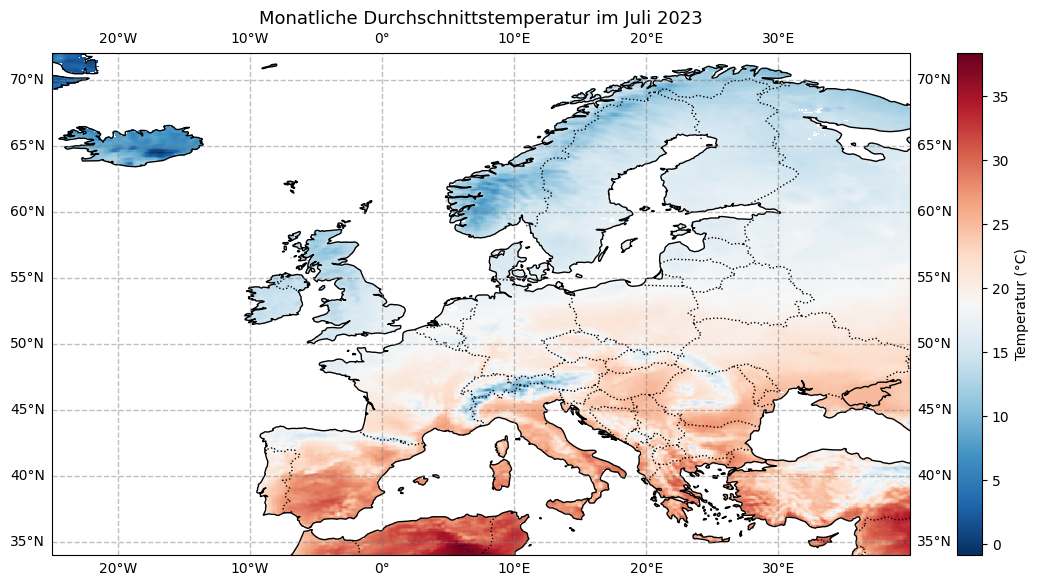

In [7]:
july = temp_data_degc.sel(time='2023-07-01')

fig, ax = plt.subplots(1, 1, figsize = (12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

im = plt.pcolormesh(july.longitude, july.latitude, july, cmap='RdBu_r')

ax.set_title('Monatliche Durchschnittstemperatur im Juli 2023', fontsize=13)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines(color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())

cbar = plt.colorbar(im,fraction=0.027, pad=0.05)
cbar.set_label('Temperatur (°C)')


fig.savefig(f'{DATADIR}ERA5_Europe_2023-07_mean.png')

## Monatlicher Durchschnittsniederschlag im Juli 2023

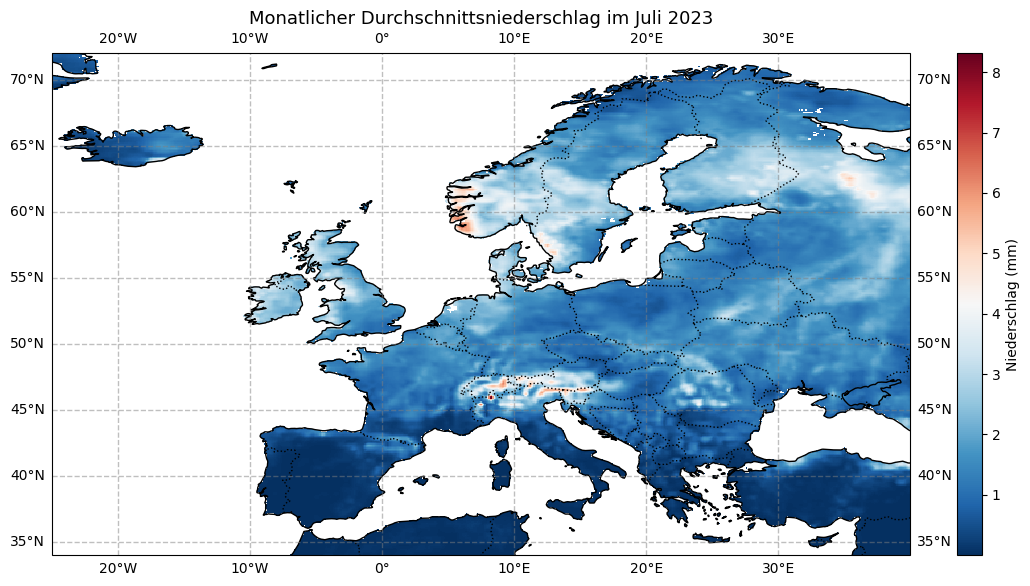

In [8]:
july_tp = tp_data_mm.sel(time='2023-07-01')

fig, ax = plt.subplots(1, 1, figsize = (12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

im = plt.pcolormesh(july_tp.longitude, july_tp.latitude, july_tp, cmap='RdBu_r')

ax.set_title('Monatlicher Durchschnittsniederschlag im Juli 2023', fontsize=13)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines(color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())

cbar = plt.colorbar(im,fraction=0.027, pad=0.05)
cbar.set_label('Niederschlag (mm)')


fig.savefig(f'{DATADIR}ERA5_Europe_2023-07_mean_TP.png')

## Calculate monthly climatology and anomalies Temperature

In [9]:
clim_period = temp_data_degc.sel(time=slice('1991-01-01', '2020-12-01'))

clim_month = clim_period.groupby('time.month').mean()

anom_month = temp_data_degc.groupby('time.month') - clim_month

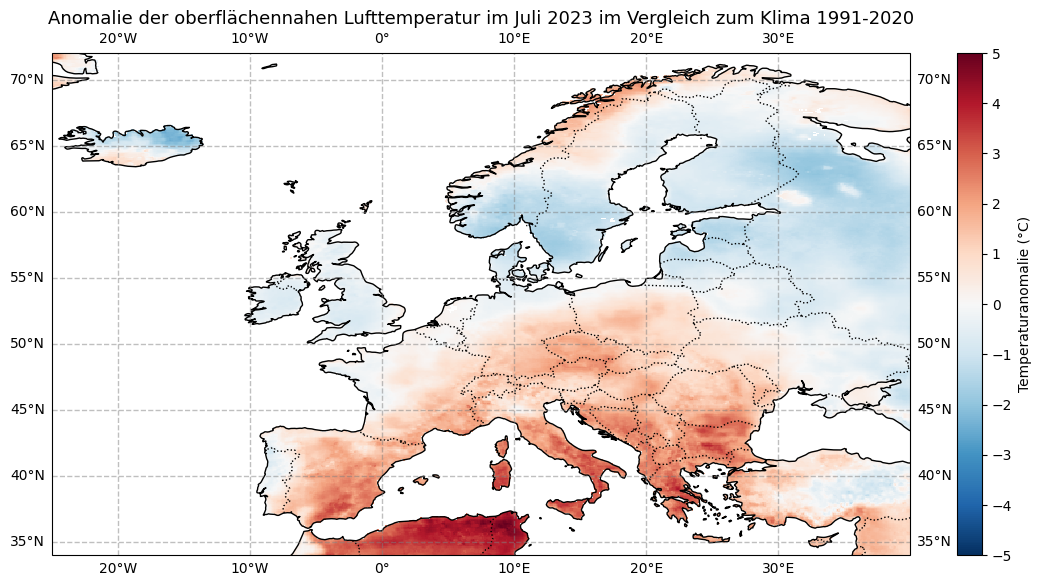

In [35]:
anom_july = anom_month[anom_month.month == 7]

# Define vmin and vmax for the color scale
vmin = -5
vmax = 5

fig, ax = plt.subplots(1, 1, figsize = (12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

im = plt.pcolormesh(anom_july.longitude, anom_july.latitude, anom_july[32,:,:], cmap='RdBu_r',vmin=vmin, vmax=vmax) #[32,:,:] selects the last year, [0,:,:] would be the first =1991

ax.set_title('Anomalie der oberflächennahen Lufttemperatur im Juli 2023 im Vergleich zum Klima 1991-2020', fontsize=13)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines(color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())


# Customize the colorbar
cbar = plt.colorbar(im, fraction=0.027, pad=0.05)
cbar.set_label('Temperaturanomalie (°C)')

# Set colorbar ticks to show 1-degree steps from +5 to -5
cbar.ax.yaxis.set_major_locator(MultipleLocator(1))


fig.savefig(f'{DATADIR}ERA5_Europe_2023-07_anomaly.png')

## Calculate monthly climatology and anomalies Precipitation

In [25]:
clim_period_tp = tp_data_mm.sel(time=slice('1991-01-01', '2020-12-01'))

clim_month_tp = clim_period_tp.groupby('time.month').mean()

anom_month_tp = tp_data_mm.groupby('time.month') - clim_month_tp

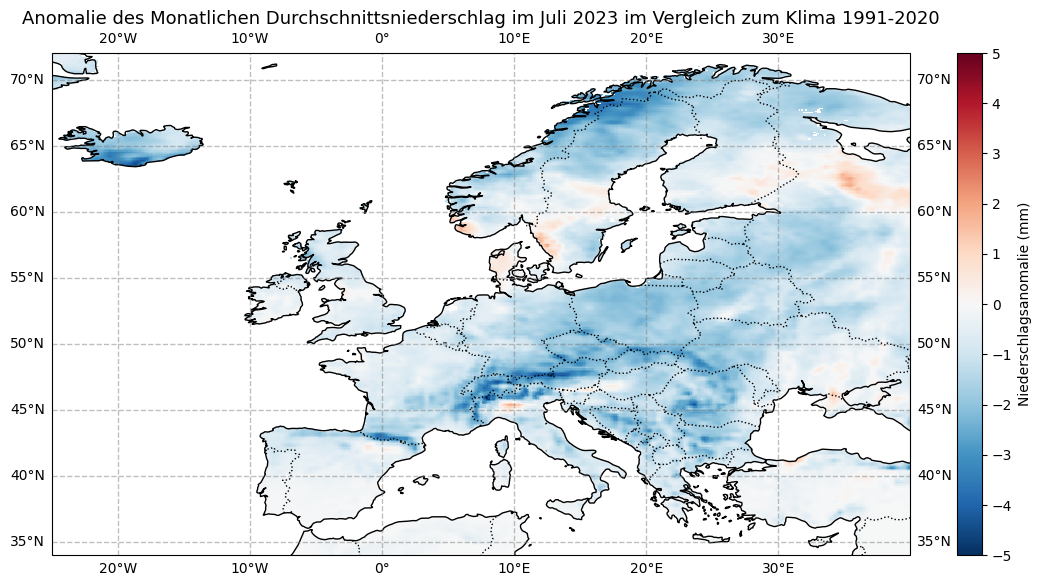

In [36]:
anom_juli_tp = anom_month_tp[anom_month_tp.month == 7]

# Define vmin and vmax for the color scale
vmin = -5
vmax = 5

fig, ax = plt.subplots(1, 1, figsize = (12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

im = plt.pcolormesh(anom_juli_tp.longitude, anom_juli_tp.latitude, anom_juli_tp[32,:,:], cmap='RdBu_r',vmin=vmin, vmax=vmax) #[32,:,:] selects the last year, [0,:,:] would be the first =1991

ax.set_title('Anomalie des Monatlichen Durchschnittsniederschlag im Juli 2023 im Vergleich zum Klima 1991-2020', fontsize=13)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines(color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())

cbar = plt.colorbar(im,fraction=0.027, pad=0.05)
cbar.set_label('Niederschlagsanomalie (mm)')
cbar.ax.yaxis.set_major_locator(MultipleLocator(1))

fig.savefig(f'{DATADIR}ERA5_Europe_2023-07_anomaly_TP.png')